# DT Kmeans TEST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [3]:
df = pd.read_csv("train_cleaned_kmeans4.csv")
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,2
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,1


In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [6]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

### Preparing the Test Dataset

In [7]:
test = pd.read_csv("test_cleaned_kmeans4.csv")
test.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Untrue,206826,0,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,0.1040,0.00607,0.000000,0.2610,0.668,110.584,4.0,industrial,1
1,High Roller,329733,0,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,0.0596,0.28100,0.827000,0.0992,0.140,171.752,4.0,breakbeat,3
2,Na Tum Jano Na Hum (ReVibe),136000,0,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,0.0326,0.09460,0.000005,0.1390,0.285,90.024,4.0,indian,1
3,いじわるなハロー,247040,0,25,Perfume,Cling Cling,0.500,0.958,0,-1.695,0.0350,0.00817,0.318000,0.7320,0.955,130.059,4.0,j-idol,1
4,Hit The Ceiling,208120,0,0,Audio Bullys,Ego War,0.802,0.684,1,-8.839,0.1230,0.00181,0.010200,0.2360,0.637,130.022,4.0,breakbeat,1


In [8]:
test = test.replace({"explicit": {False:0, True:1}})

In [9]:
X_train = df[attributes].values
y_train = df["kmeans.labels_"]

In [10]:
X_test = test[attributes].values
y_test = test["kmeans.labels_"]

### Decision Tree Classifier Pre-Pruning parameters

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

### Decision Tree

In [12]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0004, criterion='entropy', min_samples_leaf=5, max_depth=15, min_samples_split=5)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0004, criterion='entropy', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5, random_state=0)

In [13]:
y_train_pred = dtp.predict(X_train)
y_test_pred = dtp.predict(X_test)

In [14]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3186
           1       0.99      0.99      0.99      6852
           2       0.98      0.99      0.98      1771
           3       0.99      0.99      0.99      3191

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



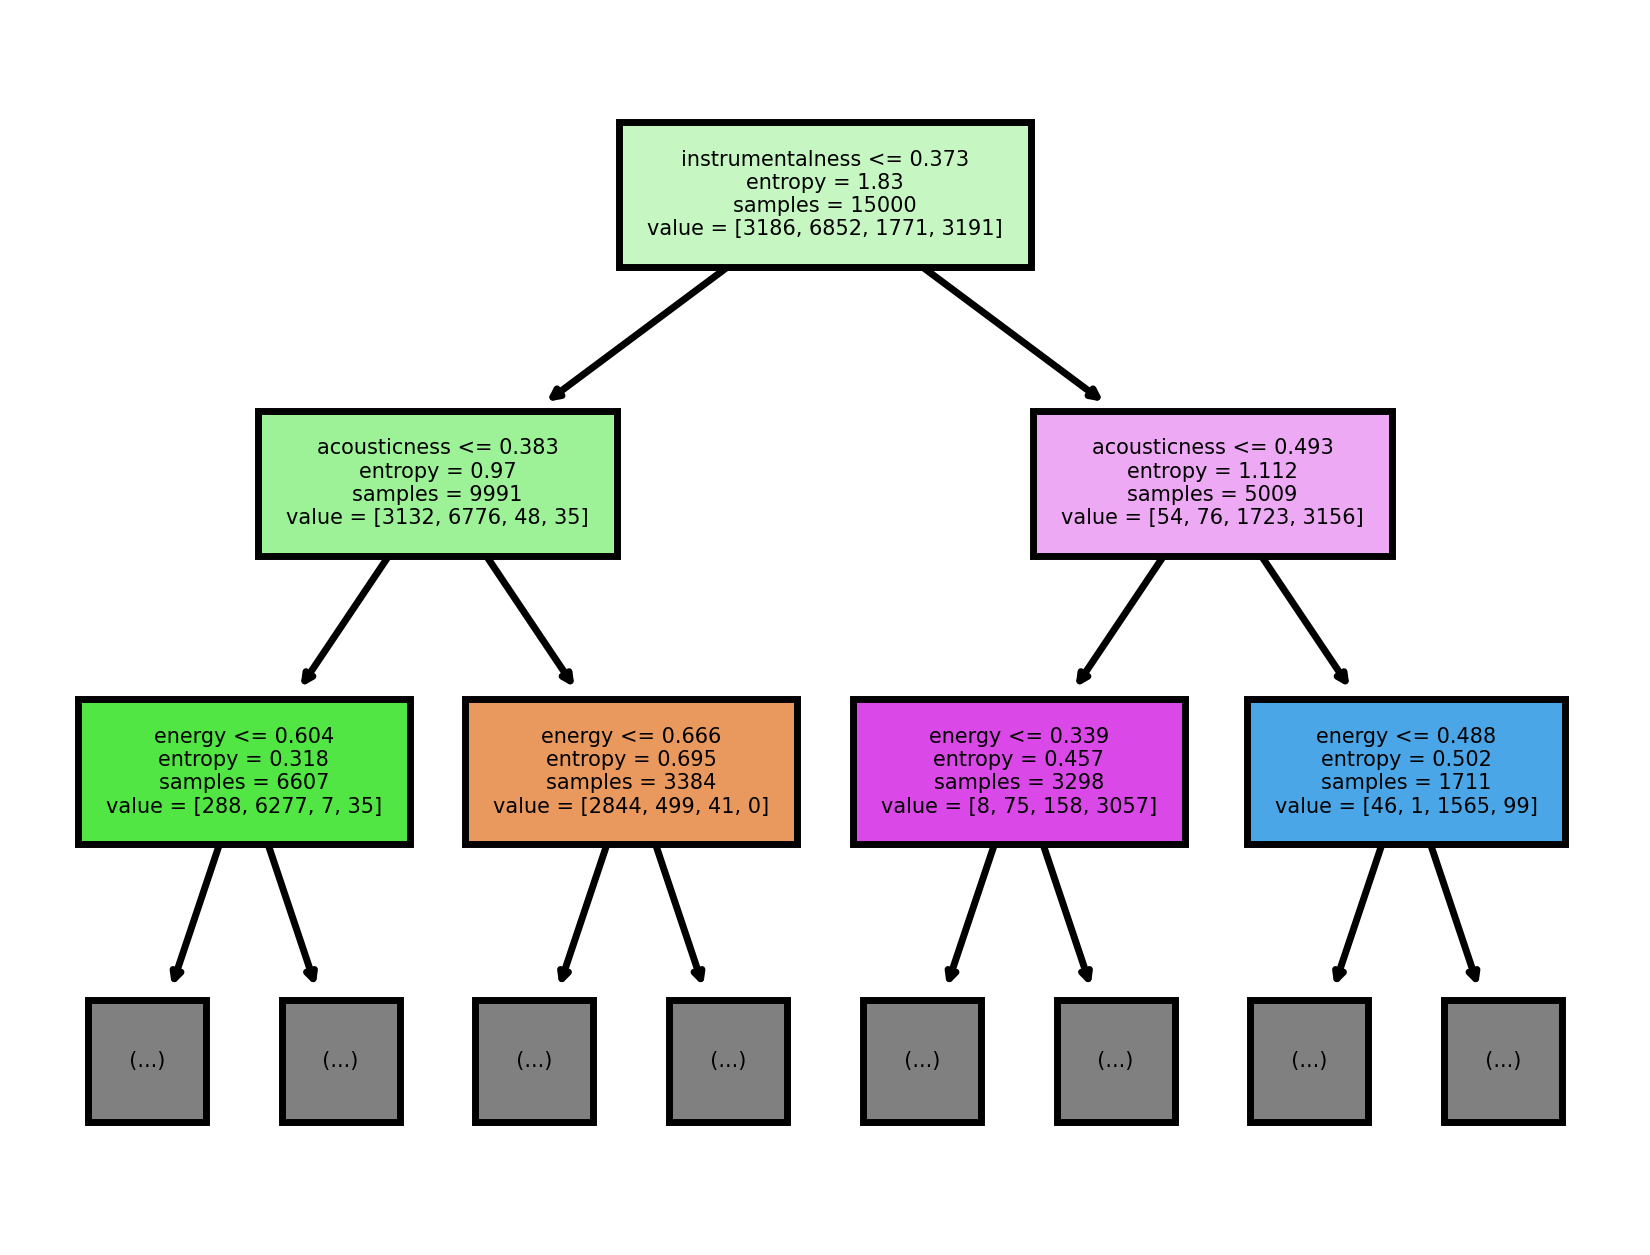

In [38]:
plt.figure(figsize=(4, 3), dpi=500)
plot_tree(dtp, max_depth=2, feature_names=attributes, filled=True, fontsize=3)
plt.savefig('DT Kmeans FE PostP.png')
plt.show()

### Scores and Heatmap

In [16]:
%%time
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9882666666666666
Train F1-score [0.98276402 0.99203391 0.98312711 0.9885562 ]

Test Accuracy 0.9668
Test F1-score [0.95456719 0.97395491 0.96163265 0.96643026]
CPU times: total: 0 ns
Wall time: 7.4 ms


In [17]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1027
           1       0.98      0.97      0.97      2298
           2       0.97      0.95      0.96       618
           3       0.97      0.97      0.97      1057

    accuracy                           0.97      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.97      0.97      0.97      5000



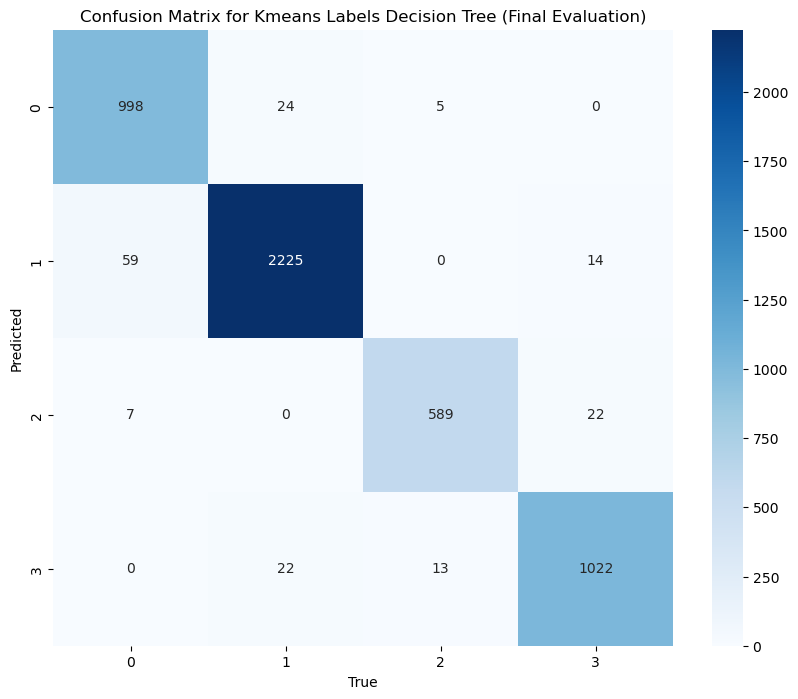

In [35]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix for Kmeans Labels Decision Tree (Final Evaluation)')
sns.heatmap(cf, annot=True, cmap="Blues", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.savefig('DT Kmeans FE Heatmap PostP.png')
plt.show()

In [19]:
dtp.score(X_test, y_test)

0.9668

### Model Evaluation

In [20]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

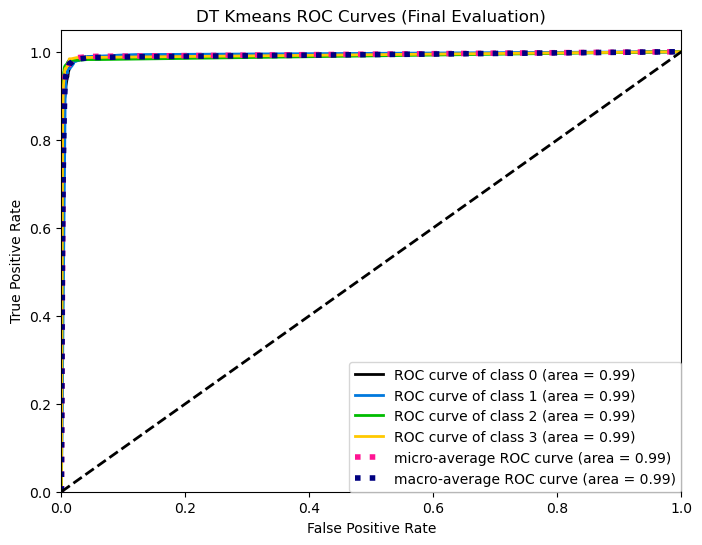

In [21]:
plot_roc(y_test, dtp.predict_proba(X_test), figsize=(8,6))
plt.title('DT Kmeans ROC Curves (Final Evaluation)')
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0), borderaxespad=0)
plt.show()

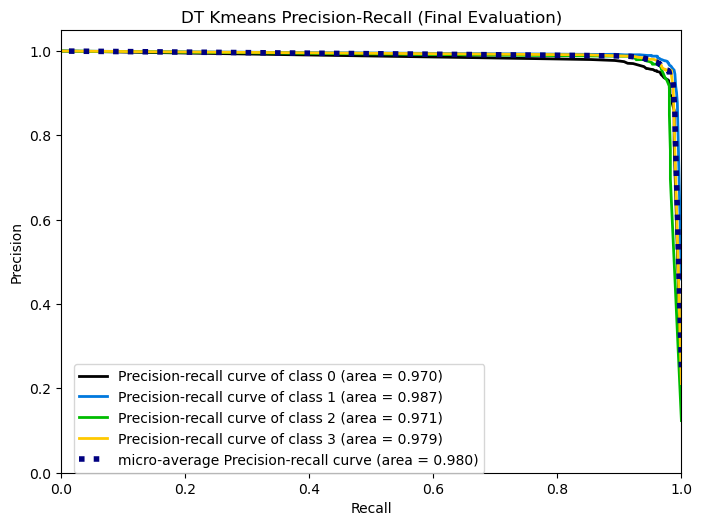

In [22]:
plot_precision_recall(y_test, dtp.predict_proba(X_test), figsize=(8,5.75))
plt.title('DT Kmeans Precision-Recall (Final Evaluation)')
plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0), borderaxespad=0)
plt.show()

### Feature Importance

In [23]:
zipped = zip(attributes, dtp.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

instrumentalness 0.48738872636080166
acousticness 0.36425528246286504
energy 0.10740888948566148
valence 0.025139086555733325
danceability 0.006203281591129764
tempo 0.0029183208449583757
loudness 0.0019560685454706166
key 0.0019009156634087986
speechiness 0.0017028755196212973
liveness 0.001126552970349704


In [24]:
dtp.feature_importances_

array([0.00620328, 0.00291832, 0.10740889, 0.00195607, 0.36425528,
       0.00170288, 0.48738873, 0.00112655, 0.02513909, 0.00190092])

In [25]:
dtp.get_params()

{'ccp_alpha': 0.0004,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [26]:
dtp.predict_proba(X_test)

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        ],
       ...,
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.02777778, 0.        , 0.        , 0.97222222]])

In [27]:
accuracy_score(y_test,y_test_pred)

0.9668

In [28]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.9668

In [29]:
precision_score(y_test,y_test_pred, average='macro')

0.9635085073600843

In [30]:
feature_importance = pd.DataFrame(dtp.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

,0
instrumentalness,0.487389
acousticness,0.364255
energy,0.107409
valence,0.025139
danceability,0.006203
tempo,0.002918
loudness,0.001956
key,0.001901
speechiness,0.001703
liveness,0.001127


<Axes: title={'center': 'Feature importance (Kmeans)'}>

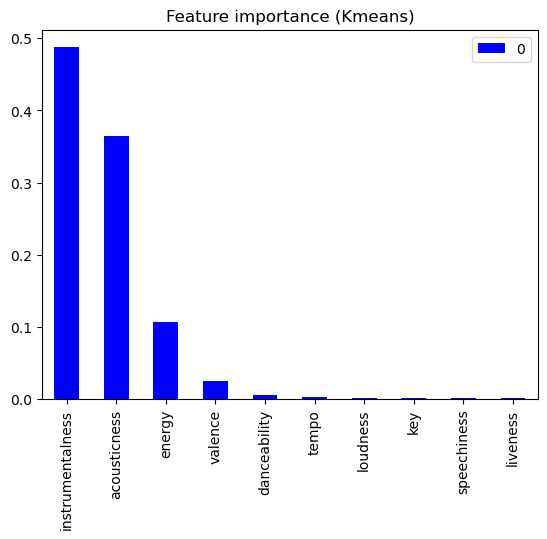

In [32]:
feature_importance.plot(kind='bar', color='blue', title='Feature importance (Kmeans)')

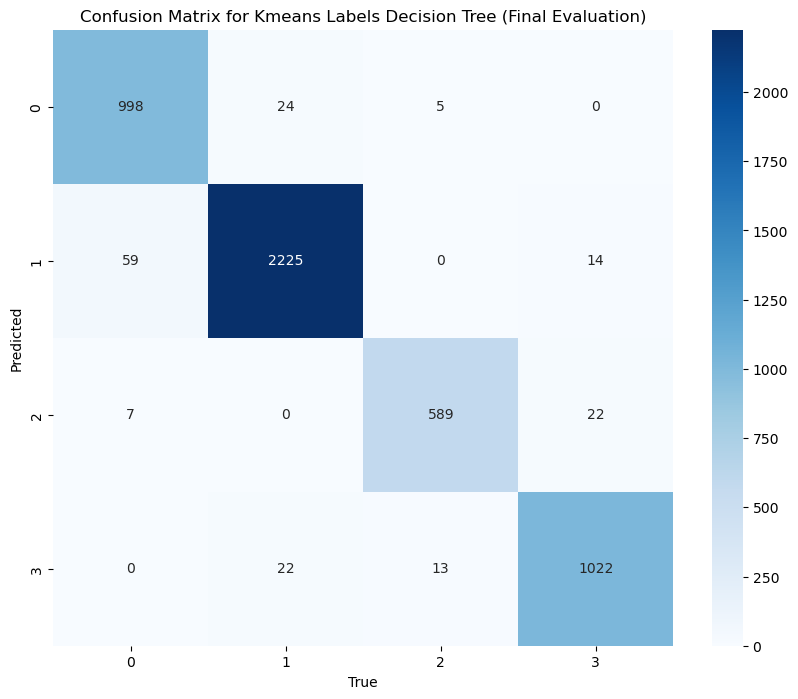

In [37]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix for Kmeans Labels Decision Tree (Final Evaluation)')
sns.heatmap(cf, annot=True, cmap="Blues", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()